## Insurance Claim Fraud Detection

**Evaluation Project - Phase 3**

**Submitted By: Bisola Beauty Ayankoya**

## Project Description

Insurance fraud presents a significant challenge within the industry, with the identification of fraudulent claims proving particularly elusive. Leveraging machine learning offers a promising avenue for addressing this issue within the auto insurance sector.
This project offers a dataset containing comprehensive information on insurance policies and customer profiles, including details of accidents leading to claims. Through this example, we aim to showcase the development of a predictive model using auto insurance data, specifically focusing on its ability to discern whether a claim is fraudulent or legitimate.Below is a link to the Project's dataset:
https://raw.githubusercontent.com/FlipRoboTechnologies/ML_Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv

**Problem Statement** : To develop a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# Import all neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import joblib

In [2]:
# Importing Dataset 
df_fraudclaim= pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv')
df_fraudclaim

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


On this data,some missing values can be identified with the ? symbol, hence we will replace them.

In [3]:
# Replacing missing values with np.nan 
df_fraudclaim.replace('?', np.nan, inplace = True)

In [4]:
# Exploring the data
df_fraudclaim.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,NaN,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [5]:
df_fraudclaim.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,...,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,...,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,...,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,NaN,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,NaN,5060,460,920,3680,Mercedes,E400,2007,N,NaN


## Exploratory Data Analysis(EDA)

In [6]:
# Let's Display the first few rows of the dataset
df_fraudclaim.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
#Checking the dimension of the dataset
df_fraudclaim.shape

(1000, 40)

The dataset contains 1000 rows and 40 columns.Hence, we have 1 target variable and 39 independent varbiables.

In [8]:
# Checking the dataset column
df_fraudclaim.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
# Checking the list of columns
df_fraudclaim.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [10]:
# checking types of columns in the dataset
df_fraudclaim.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are Three(3) different types of data(int64,object and float64) present in the dataset.

**The Description of all variables**

**Independent Variables**
1.	**months_as_customer**: Number of months of patronage
2.	**age**: the length of time a customer has lived or a thing has existed
3.	**policy_number**: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	**policy_bind_date**:date which document that is given to customer after we accept your proposal for insurance
5.	**policy_state**: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	**policy_csl**: is basically Combined Single Limit
7.	**policy_deductable**: the amount of money that a customer is responsible for paying toward an insured loss
8.	**policy_annual_premium**: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	**umbrella_limit**: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	**insured_zip**: It is the zip code where the insurance was made
11.	**insured_sex**: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	**insured_education_level**: This refers to the Level of education of the customer
13.	**insured_occupation**: This refers Occupation of the customer
14.	**insured_hobbies**: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	**insured_relationship**: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	**capital-gains**: This refers to profit accrued due to insurance premium
17.	**capital-loss**: This refers to the losses incurred due to insurance claims
18.	**incident_date**: This refers to the date which claims where made by customers
19.	**incident_type**: This refers to the type of claim/vehicle damage made by customer
20.	**collision_type**: This refers to the area of damage on the vehicle
21.	**incident_severity**: This refers to the extent/level of damage
22.	**authorities_contacted**: This refers to the government agencies that were contacted after damage
23.	**incident_state**: This refers to the state at which the accident happened
24.	**incident_city**: This refers to the city at which the accident happened
25.	**1ncident_location**: This refers to the location at which the accident happened
26.	**incident_hour_of_the_day**: The period of the day which accident took place
27.	**number_of_vehicles_involved**: This refers to number of vehicles involved the accident
28.	**property_damage**: This refers to whether property was damaged or not
29.	**bodily_injuries**: This refers to injuries sustained
30.	**witnesses**: This refers to the number of witnesses involved
31.	**police_report_available**: This refers to whether the report on damage was documented or not
32.	**total_claim_amount**: This refers to the financial implications involved in claims
33.	**injury_claim**: This refers to physical injuries sustained
34.	**property_claim**: This refers to property damages during incident
35.	**vehicle_claim**: This refers to property damages during incident
36.	**auto_make**: This refers to the make of the vehicle
37.	**auto_model**: This refers to the model of the vehicle
38.	**auto_year**: This refers to the year which the vehicle was manufactured
39.	**_c39**:

**Dependent variable (desired target)**:

40.	fraud_reported: Whether the insurance claim is fraudulent "Yes" or not "No".


### Data Preprocessing

In [11]:
# Checking the column info
df_fraudclaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

These shows some of the attributes of the dataset,which includes **indexing type**,**column type**,**non null values and memory usage**.Also there are some missing values in the dataset and needs to be handled.

In [12]:
#checking null values
df_fraudclaim.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

These are the null/missing we have identified

In [13]:
# Total Number of missing values in the dataset
df_fraudclaim.isnull().sum().sum()

1881

**Handling the Missing Values**

In [14]:
# Lets fill the missing values
df_fraudclaim['collision_type'] = df_fraudclaim['collision_type'].fillna(df_fraudclaim['collision_type'].mode()[0])
df_fraudclaim['property_damage'] = df_fraudclaim['property_damage'].fillna(df_fraudclaim['property_damage'].mode()[0])
df_fraudclaim['police_report_available'] = df_fraudclaim['police_report_available'].fillna(df_fraudclaim['police_report_available'].mode()[0])

In [15]:
# Check again the null values
df_fraudclaim.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The null values has now been treated

In [16]:
# Lets Get a better overview of the dataset
df_fraudclaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

As seen above,there are no more null values present in this dataset.Also we will be dropping/removing some columns as we proceed because they have little or no impact on our predictions.  

In [17]:
# Dropping the _c39 column
df_fraudclaim.drop('_c39',axis=1,inplace=True)

In [18]:
# Checking to confirm it has been dropped
df_fraudclaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Confirmed,hence There are no missing values in the DataSet, all complete 1000.

<AxesSubplot:>

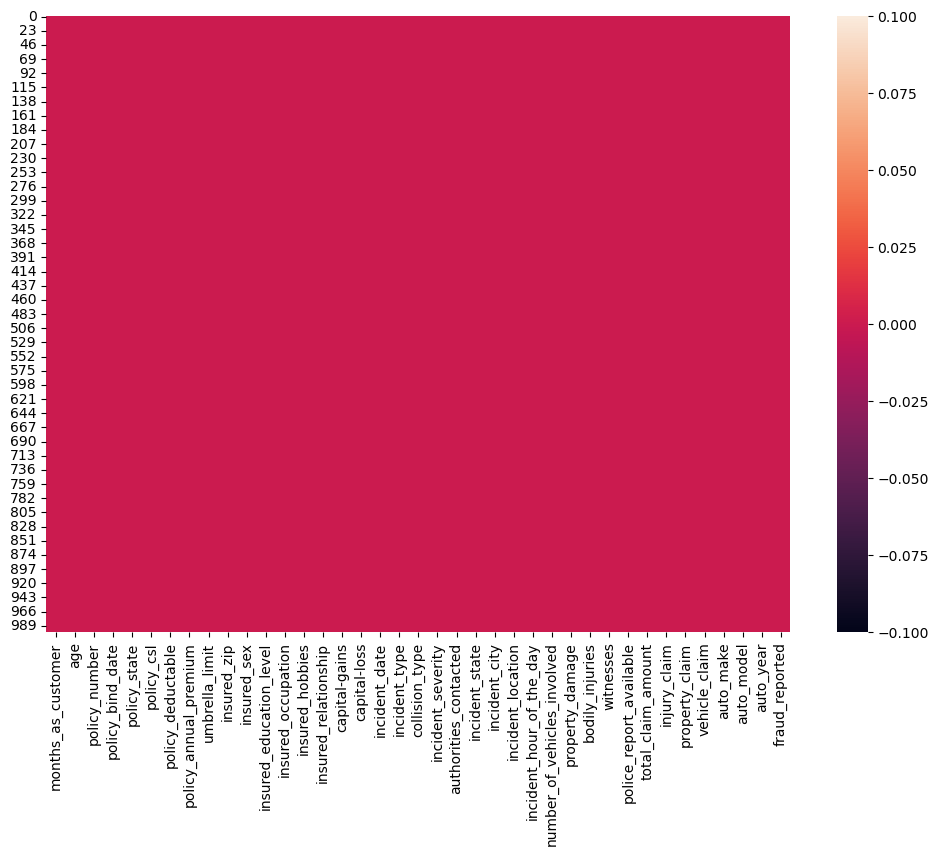

In [19]:
# Visualizing using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_fraudclaim.isnull())

We can clearly see that there are no missing data present in the dataset.

In [20]:
# Lets Describe the numerical columns of the dataframe 
df_fraudclaim.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [21]:
# Separating the numerical from categorical columns

#check out the categorical columns
categorical_col = []
for i in df_fraudclaim.dtypes.index:
    if df_fraudclaim.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)
print("\n")

#Check for Numerical column
numerical_col = []
for i in df_fraudclaim.dtypes.index:
    if df_fraudclaim.dtypes[i]!= "object":
        numerical_col.append(i)
print("numerical columns:", numerical_col)

categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [22]:
# Checking the unique values of objects-column
for col in df_fraudclaim.select_dtypes(include='object').columns:
    print(col)
    print(df_fraudclaim[col].unique())

policy_bind_date
['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04

In [23]:
# Finding number of unique values in the column
df_fraudclaim.nunique().to_frame("No.of unique values")

,No.of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


All features have more than one single value.

In [24]:
df_fraudclaim.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [25]:
# Checking the list of counts of target
df_fraudclaim["fraud_reported"].unique()

array(['Y', 'N'], dtype=object)

There are two categories present in the target column namely "Yes" and "No"

In [26]:
# Checking the unique values in target column
df_fraudclaim['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

We assume that **"Yes"** stands for fraudulent claims and **"No"** for non-fraudulent claims.

### Dataset Description

In [27]:
# Statistical summary of numerical columns
df_fraudclaim.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


These are the statistical details of the numerical columns.The dataset summary looks good because there are no -ve/invalid values present.

From the above we can analyse further-:

1.  The counts of all the columns are of same values, hence there are no missing values in the dataset.
2.  The mean value is greater than the median(50%) in all the column except the "policy_annual_premium" which means the data is     a bit skewed to right in these columns.
3.  The data in the column "policy_annual_premium" with a less mean value to the median,implied that this data is skewed to the      left.
4.  By summarizing the data we can observe there is a huge differences between 75% and max, meaning there are outliers present       in the data.
5.  We can also notice the Standard deviation,min,25% percentile from this describe method.

In [28]:
# Lets also check the statistical distribution for numerical features
df_fraudclaim.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


# Data Visualization

**Univariate analysis**

In [29]:
# Visualizing the number of fraudulent claims
print(df_fraudclaim['fraud_reported'].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


In [30]:
target_df=df_fraudclaim['fraud_reported'].value_counts()*100/df_fraudclaim.shape[0]
target_df

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

In [31]:
df_fraudclaim['fraud_reported'].value_counts(normalize=True)*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

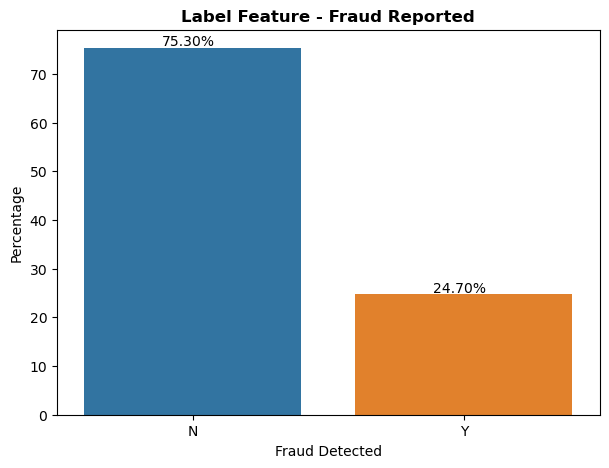

In [32]:
plt.figure(figsize=(7,5))
plt.title("Label Feature - Fraud Reported",fontdict={'fontweight':'bold','fontsize':12})
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Fraud Detected')
plt.ylabel('Percentage')

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x+width/2.8,height+0.5,f'{height:.2f}%')

We can observe that the count of "No fraud reported" is higher than that of "Yes fraud reported" i.e.there are less cases in the number of fraudulent claim report.This leads to **CLASS IMBALANCE** issue in the data.we will therefore correct it by using **OVERSAMPLING METHOD** later as we progress.

In [33]:
#Identify the categorical variables
categorical_variables=[feature for feature in df_fraudclaim.columns if ((df_fraudclaim[feature].dtypes=='O') & (feature not in ['claim']))]
categorical_variables

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


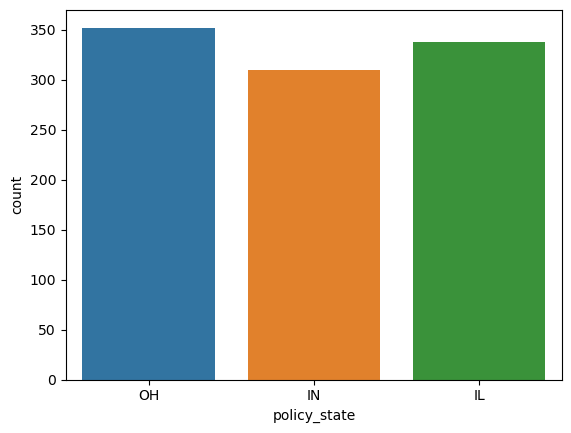

In [34]:
# Visualizing the count of policy state
print(df_fraudclaim['policy_state'].value_counts())
ax = sns.countplot(x='policy_state', data=df_fraudclaim)
plt.show()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


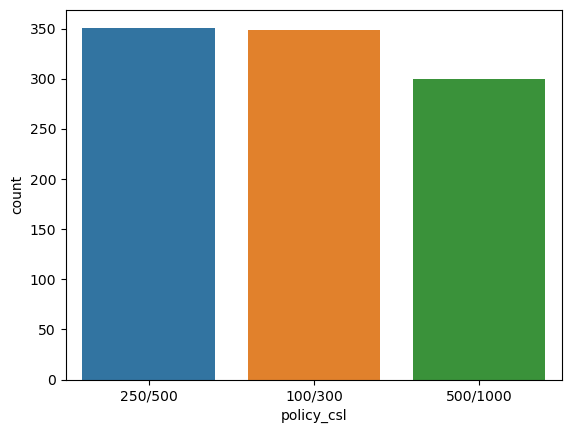

In [35]:
# Visualizing the count of policy csl
print(df_fraudclaim['policy_csl'].value_counts())
ax = sns.countplot(x='policy_csl', data=df_fraudclaim)
plt.show()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


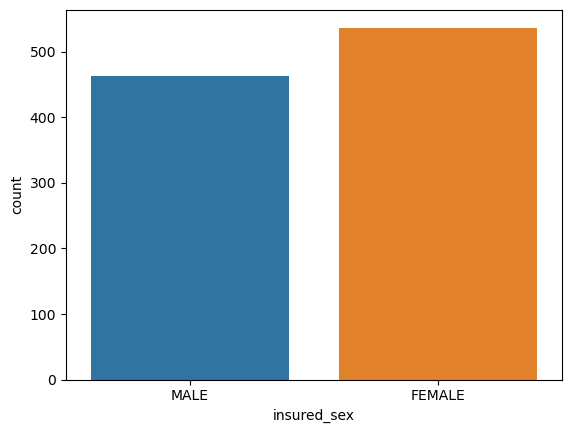

In [36]:
# Visualizing the count of insured sex
print(df_fraudclaim['insured_sex'].value_counts())
ax = sns.countplot(x='insured_sex', data=df_fraudclaim)
plt.show()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


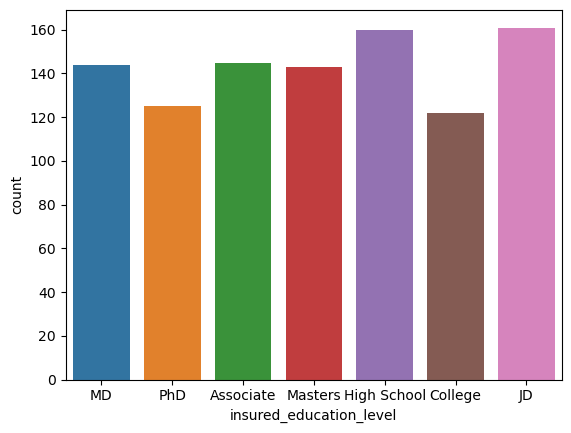

In [37]:
# Visualizing the count of insured education level
print(df_fraudclaim['insured_education_level'].value_counts())
ax = sns.countplot(x='insured_education_level', data=df_fraudclaim)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'reading'),
  Text(1, 0, 'exercise'),
  Text(2, 0, 'paintball'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'movies'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'kayaking'),
  Text(8, 0, 'yachting'),
  Text(9, 0, 'hiking'),
  Text(10, 0, 'video-games'),
  Text(11, 0, 'skydiving'),
  Text(12, 0, 'base-jumping'),
  Text(13, 0, 'board-games'),
  Text(14, 0, 'polo'),
  Text(15, 0, 'chess'),
  Text(16, 0, 'dancing'),
  Text(17, 0, 'sleeping'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'basketball')])

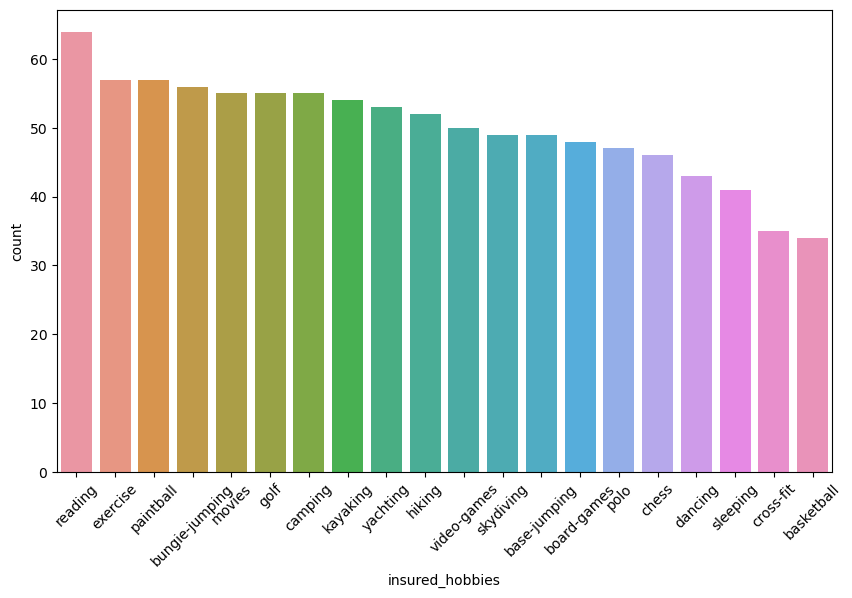

In [38]:
# Visualizing the count of insured hobbies
plt.figure(figsize=(10,6))
sns.countplot(df_fraudclaim['insured_hobbies'],order=df_fraudclaim['insured_hobbies'].value_counts().index)
plt.xticks(rotation=45)

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


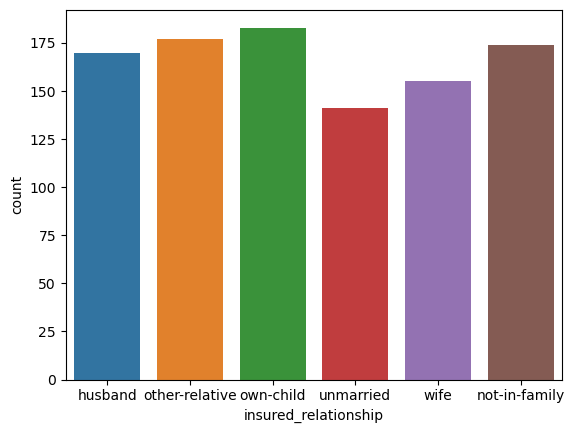

In [39]:
# Visualizing the count of insured relationship
print(df_fraudclaim['insured_relationship'].value_counts())
ax = sns.countplot(x='insured_relationship', data=df_fraudclaim)
plt.show()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


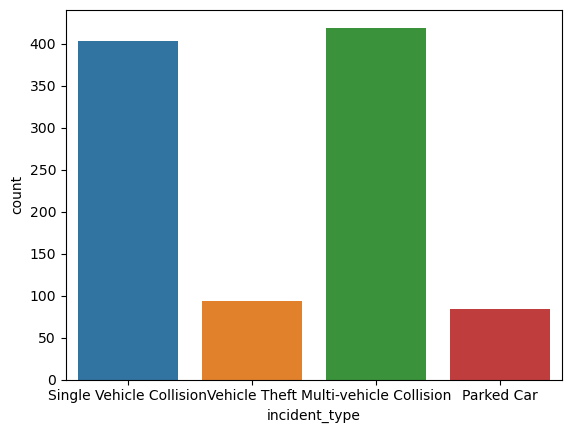

In [40]:
# Visualizing the count of incident type
print(df_fraudclaim['incident_type'].value_counts())
ax = sns.countplot(x='incident_type', data=df_fraudclaim)
plt.show()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


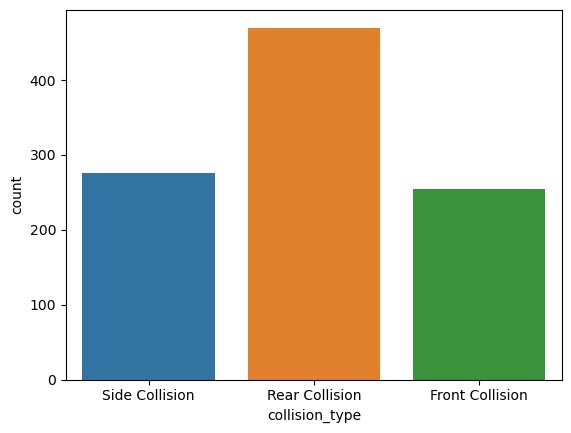

In [41]:
# Visualizing the count of collision type
print(df_fraudclaim['collision_type'].value_counts())
ax = sns.countplot(x='collision_type', data=df_fraudclaim)
plt.show()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


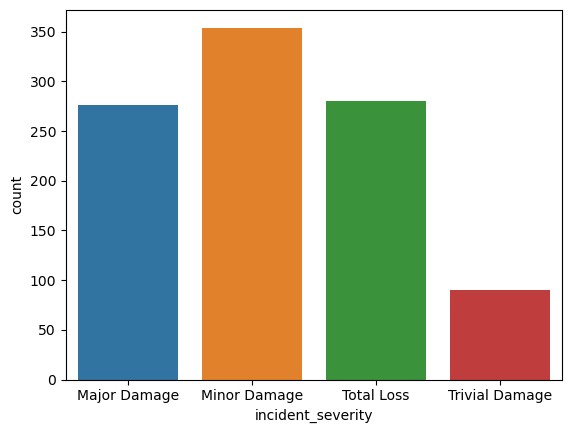

In [42]:
# Visualizing the count of incident severity
print(df_fraudclaim['incident_severity'].value_counts())
ax = sns.countplot(x='incident_severity', data=df_fraudclaim)
plt.show()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


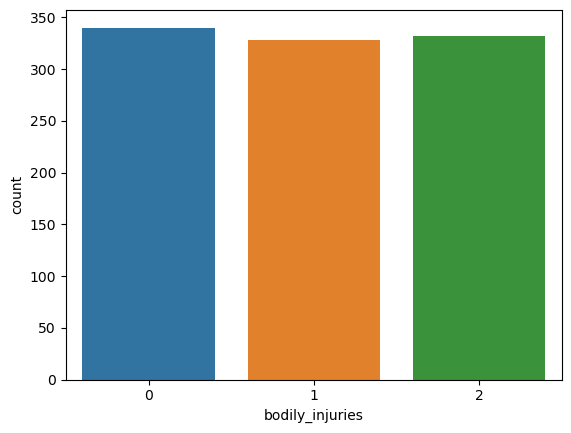

In [43]:
# Visualizing the count of bodily injuries
print(df_fraudclaim['bodily_injuries'].value_counts())
ax = sns.countplot(x='bodily_injuries', data=df_fraudclaim)
plt.show()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


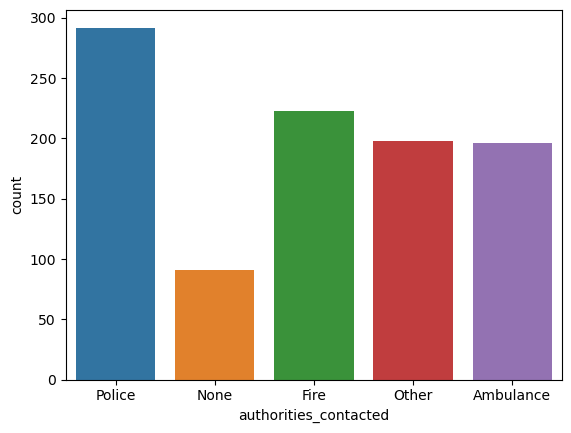

In [44]:
# Visualizing the count of authorities contacted
print(df_fraudclaim['authorities_contacted'].value_counts())
ax = sns.countplot(x='authorities_contacted', data=df_fraudclaim)
plt.show()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


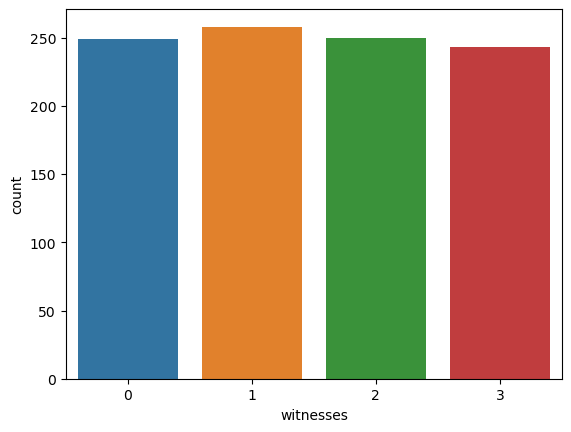

In [45]:
# Visualizing the count of witnesses
print(df_fraudclaim['witnesses'].value_counts())
ax = sns.countplot(x='witnesses', data=df_fraudclaim)
plt.show()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


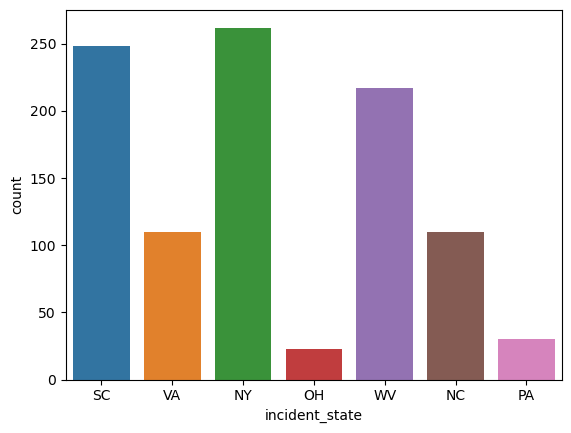

In [46]:
# Visualizing the count of incident state
print(df_fraudclaim['incident_state'].value_counts())
ax = sns.countplot(x='incident_state', data=df_fraudclaim)
plt.show()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


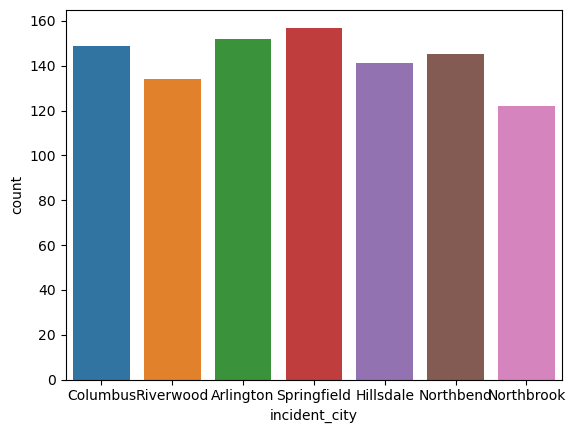

In [47]:
# Visualizing the count of incident city
print(df_fraudclaim['incident_city'].value_counts())
ax = sns.countplot(x='incident_city', data=df_fraudclaim)
plt.show()

NO     698
YES    302
Name: property_damage, dtype: int64


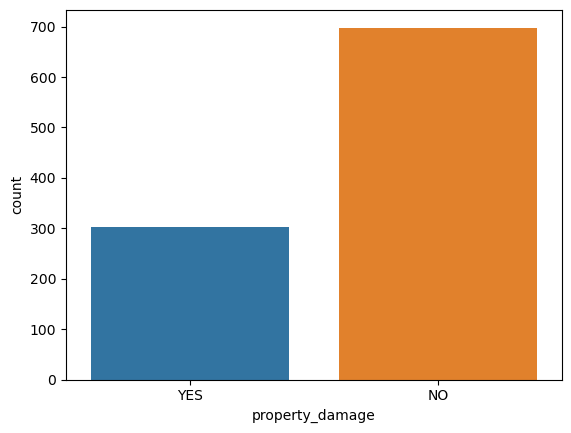

In [48]:
# Visualizing the count of property damage
print(df_fraudclaim['property_damage'].value_counts())
ax = sns.countplot(x='property_damage', data=df_fraudclaim)
plt.show()

NO     686
YES    314
Name: police_report_available, dtype: int64


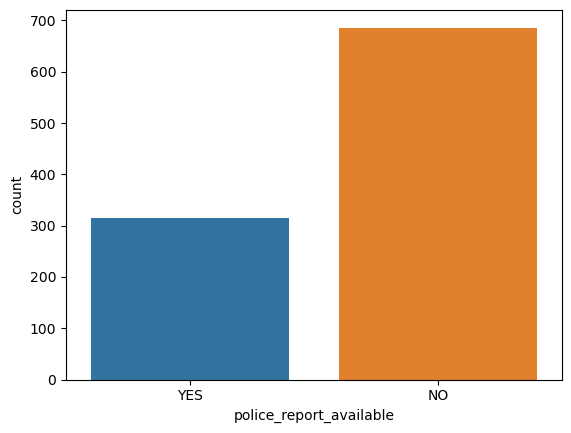

In [49]:
# Visualizing the count of police report available
print(df_fraudclaim['police_report_available'].value_counts())
ax = sns.countplot(x='police_report_available', data=df_fraudclaim)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Dodge'),
  Text(2, 0, 'Suburu'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Chevrolet'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'Accura'),
  Text(10, 0, 'Volkswagen'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes'),
  Text(13, 0, 'Honda')])

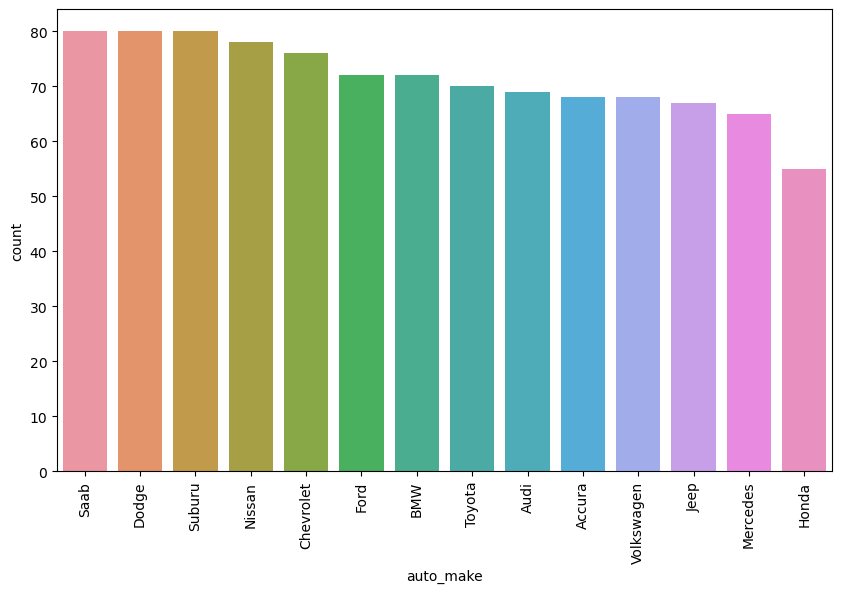

In [50]:
# Visualizing the count of auto make
plt.figure(figsize=(10,6))
sns.countplot(df_fraudclaim['auto_make'],order=df_fraudclaim['auto_make'].value_counts().index)
plt.xticks(rotation=90)

**Bivariate Analysis**

**Policy and Fraud Reported**

fraud_reported    N   Y
policy_state           
IL              261  77
IN              231  79
OH              261  91


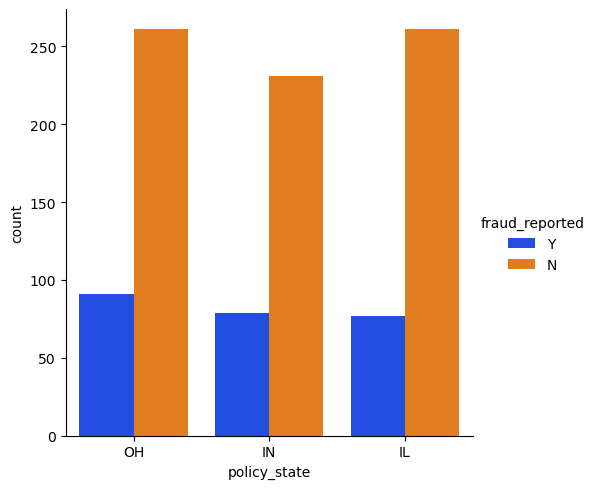

In [51]:
# Checking fraud reported and policy state
print(pd.crosstab(df_fraudclaim['policy_state'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'policy_state', hue = 'fraud_reported', palette = "bright", kind = "count", data = df_fraudclaim)
plt.show()

fraud_reported    N   Y
policy_csl             
100/300         259  90
250/500         259  92
500/1000        235  65


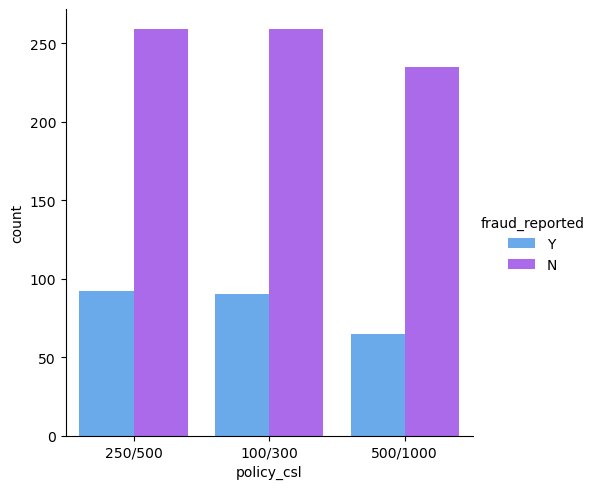

In [52]:
# Checking fraud reported and policy csl
print(pd.crosstab(df_fraudclaim['policy_csl'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'policy_csl', hue = 'fraud_reported', palette = "cool", kind = "count", data = df_fraudclaim)
plt.show()

**Insured and Fraud Reported**

fraud_reported    N    Y
insured_sex             
FEMALE          411  126
MALE            342  121


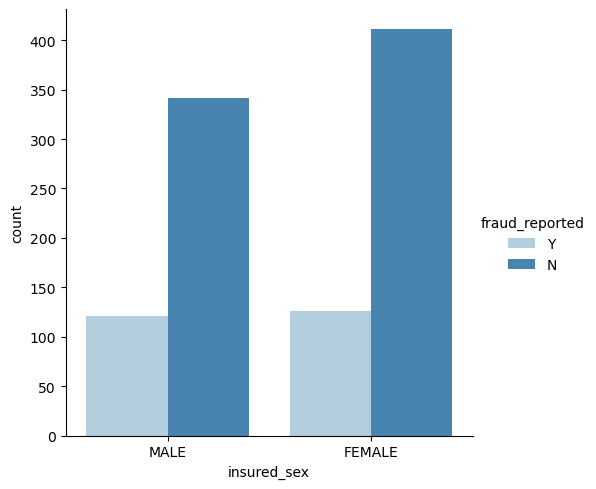

In [53]:
# Checking fraud reported and insured sex
print(pd.crosstab(df_fraudclaim['insured_sex'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'insured_sex', hue = 'fraud_reported', palette = "Blues", kind = "count", data = df_fraudclaim)
plt.show()

fraud_reported             N   Y
insured_education_level         
Associate                111  34
College                   90  32
High School              124  36
JD                       119  42
MD                       106  38
Masters                  111  32
PhD                       92  33


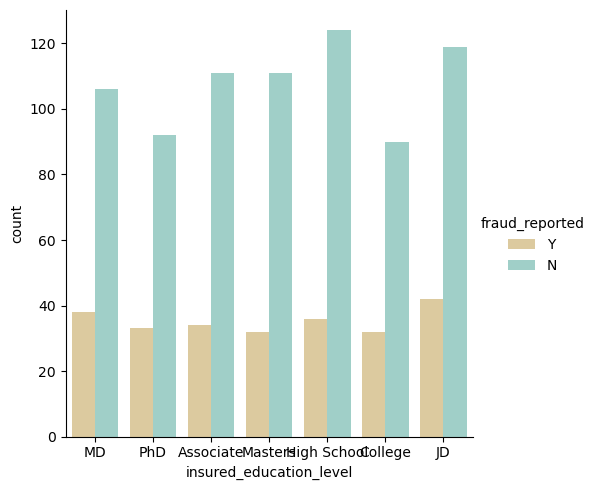

In [54]:
# Checking fraud reported and insured educational level
print(pd.crosstab(df_fraudclaim['insured_education_level'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'insured_education_level', hue = 'fraud_reported', palette = "BrBG", kind = "count", data = df_fraudclaim)
plt.show()

**Incident and Fraud Reported**

fraud_reported              N    Y
incident_type                     
Multi-vehicle Collision   305  114
Parked Car                 76    8
Single Vehicle Collision  286  117
Vehicle Theft              86    8


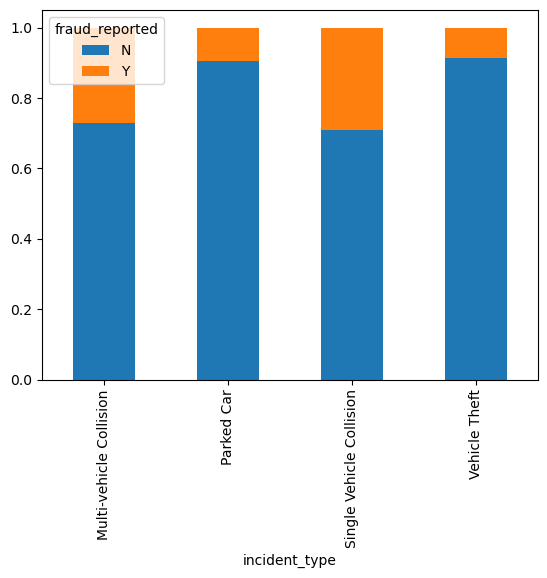

In [55]:
# Checking fraud reported and incident type
print(pd.crosstab(df_fraudclaim['incident_type'],df_fraudclaim['fraud_reported']))
table=pd.crosstab(df_fraudclaim['incident_type'],df_fraudclaim['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.show()

fraud_reported       N    Y
incident_severity          
Major Damage       109  167
Minor Damage       316   38
Total Loss         244   36
Trivial Damage      84    6


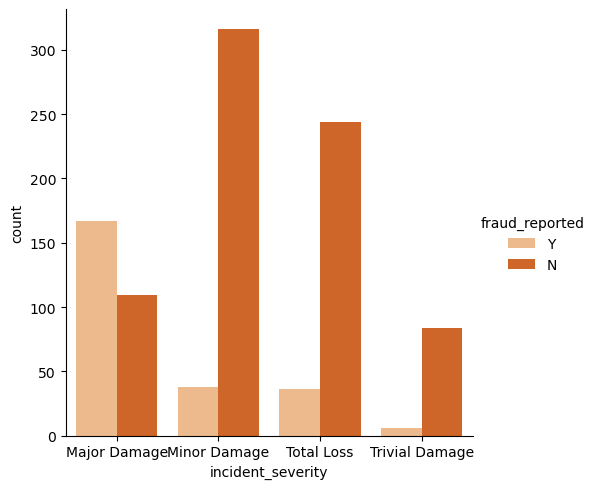

In [56]:
# Checking fraud reported and severity
print(pd.crosstab(df_fraudclaim['incident_severity'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'incident_severity', hue = 'fraud_reported', palette = "Oranges", kind = "count", data = df_fraudclaim)
plt.show()

fraud_reported    N   Y
incident_state         
NC               76  34
NY              204  58
OH               13  10
PA               22   8
SC              175  73
VA               85  25
WV              178  39


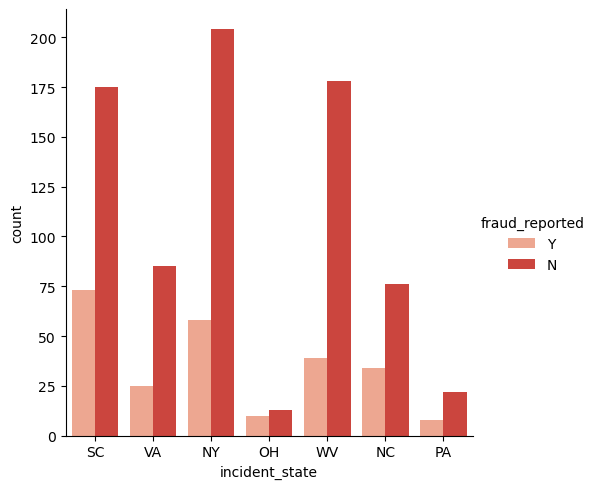

In [57]:
# Checking fraud reported and incident state
print(pd.crosstab(df_fraudclaim['incident_state'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'incident_state', hue = 'fraud_reported', palette = "Reds", kind = "count", data = df_fraudclaim)
plt.show()

fraud_reported    N   Y
incident_city          
Arlington       108  44
Columbus        110  39
Hillsdale       106  35
Northbend       111  34
Northbrook       95  27
Riverwood       104  30
Springfield     119  38


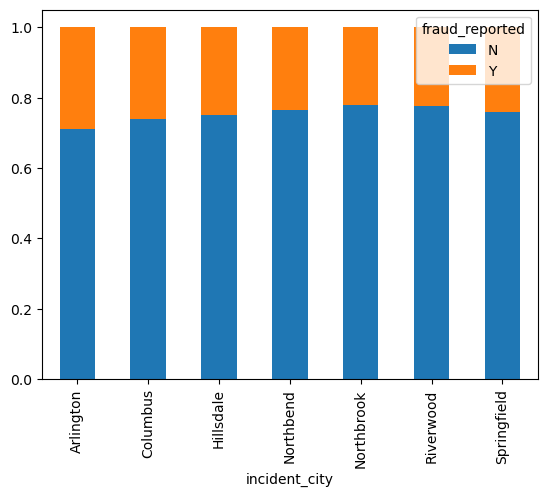

In [58]:
# Checking fraud reported and incident city
print(pd.crosstab(df_fraudclaim['incident_city'],df_fraudclaim['fraud_reported']))
table=pd.crosstab(df_fraudclaim['incident_city'],df_fraudclaim['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.show()

**Collision and Fraud Reported**

fraud_reported     N    Y
collision_type           
Front Collision  184   70
Rear Collision   363  107
Side Collision   206   70


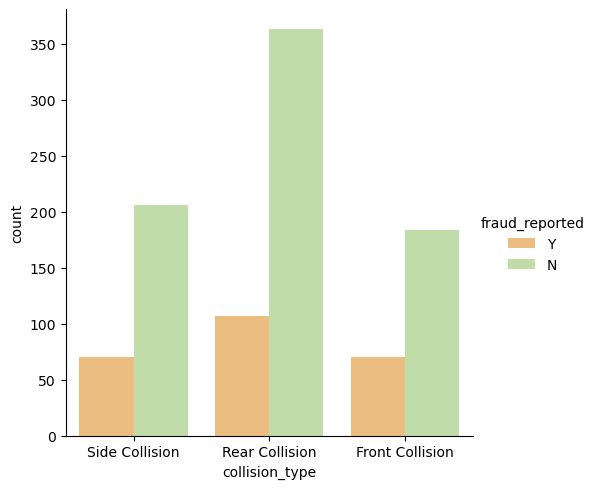

In [59]:
# Checking fraud reported and collision type
print(pd.crosstab(df_fraudclaim['collision_type'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'collision_type', hue = 'fraud_reported', palette = "Spectral", kind = "count", data = df_fraudclaim)
plt.show()

**Authorities Contacted and Fraud Reported**

fraud_reported           N   Y
authorities_contacted         
Ambulance              139  57
Fire                   163  60
None                    85   6
Other                  135  63
Police                 231  61


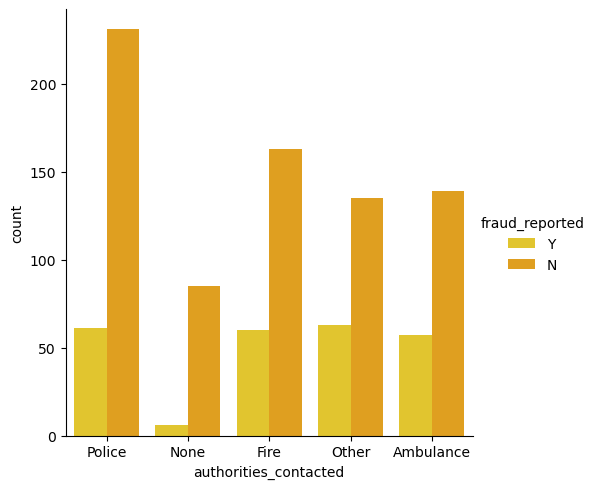

In [60]:
# Checking fraud reported and Authorities contacted
print(pd.crosstab(df_fraudclaim['authorities_contacted'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'authorities_contacted', hue = 'fraud_reported', palette = "Wistia", kind = "count", data = df_fraudclaim)
plt.show()

fraud_reported             N    Y
police_report_available          
NO                       511  175
YES                      242   72


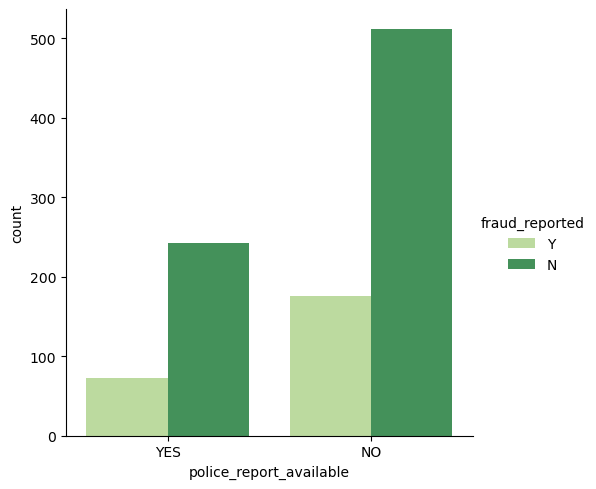

In [61]:
# Checking fraud reported and police report
print(pd.crosstab(df_fraudclaim['police_report_available'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'police_report_available', hue = 'fraud_reported', palette = "YlGn", kind = "count", data = df_fraudclaim)
plt.show()

fraud_reported     N    Y
property_damage          
NO               529  169
YES              224   78


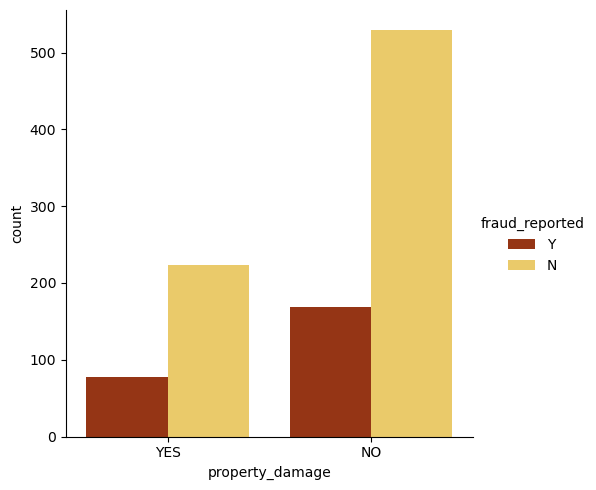

In [62]:
# Checking fraud reported and property damaged
print(pd.crosstab(df_fraudclaim['property_damage'],df_fraudclaim['fraud_reported']))
sns.catplot(x = 'property_damage', hue = 'fraud_reported', palette = "afmhot", kind = "count", data = df_fraudclaim)
plt.show()

**Auto**

Text(0.5, 0, 'age')

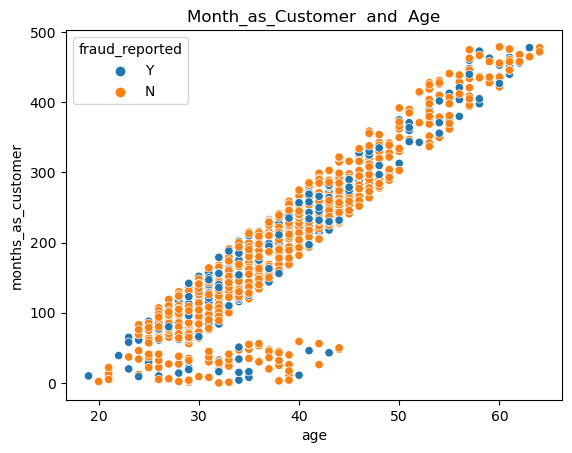

In [63]:
# Comparing  Month_as_Customer and Age on the basis of fraud reported
sns.scatterplot('age','months_as_customer',hue='fraud_reported',data=df_fraudclaim)
plt.title('Month_as_Customer  and  Age')
plt.xlabel('age',fontsize=10)

Text(0.5, 0, 'capital-loss')

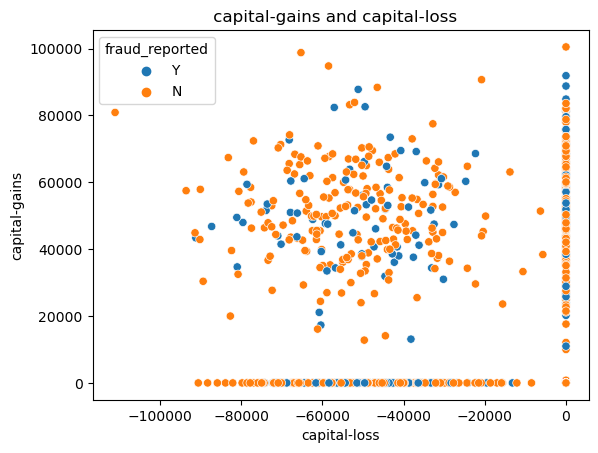

In [64]:
# Comparing Capital Gain and Capital loss on the basis of fraud reported
sns.scatterplot('capital-loss','capital-gains',hue='fraud_reported',data=df_fraudclaim)
plt.title(' capital-gains and capital-loss   ')
plt.xlabel('capital-loss',fontsize=10)

**Checking for and removing Outliers**

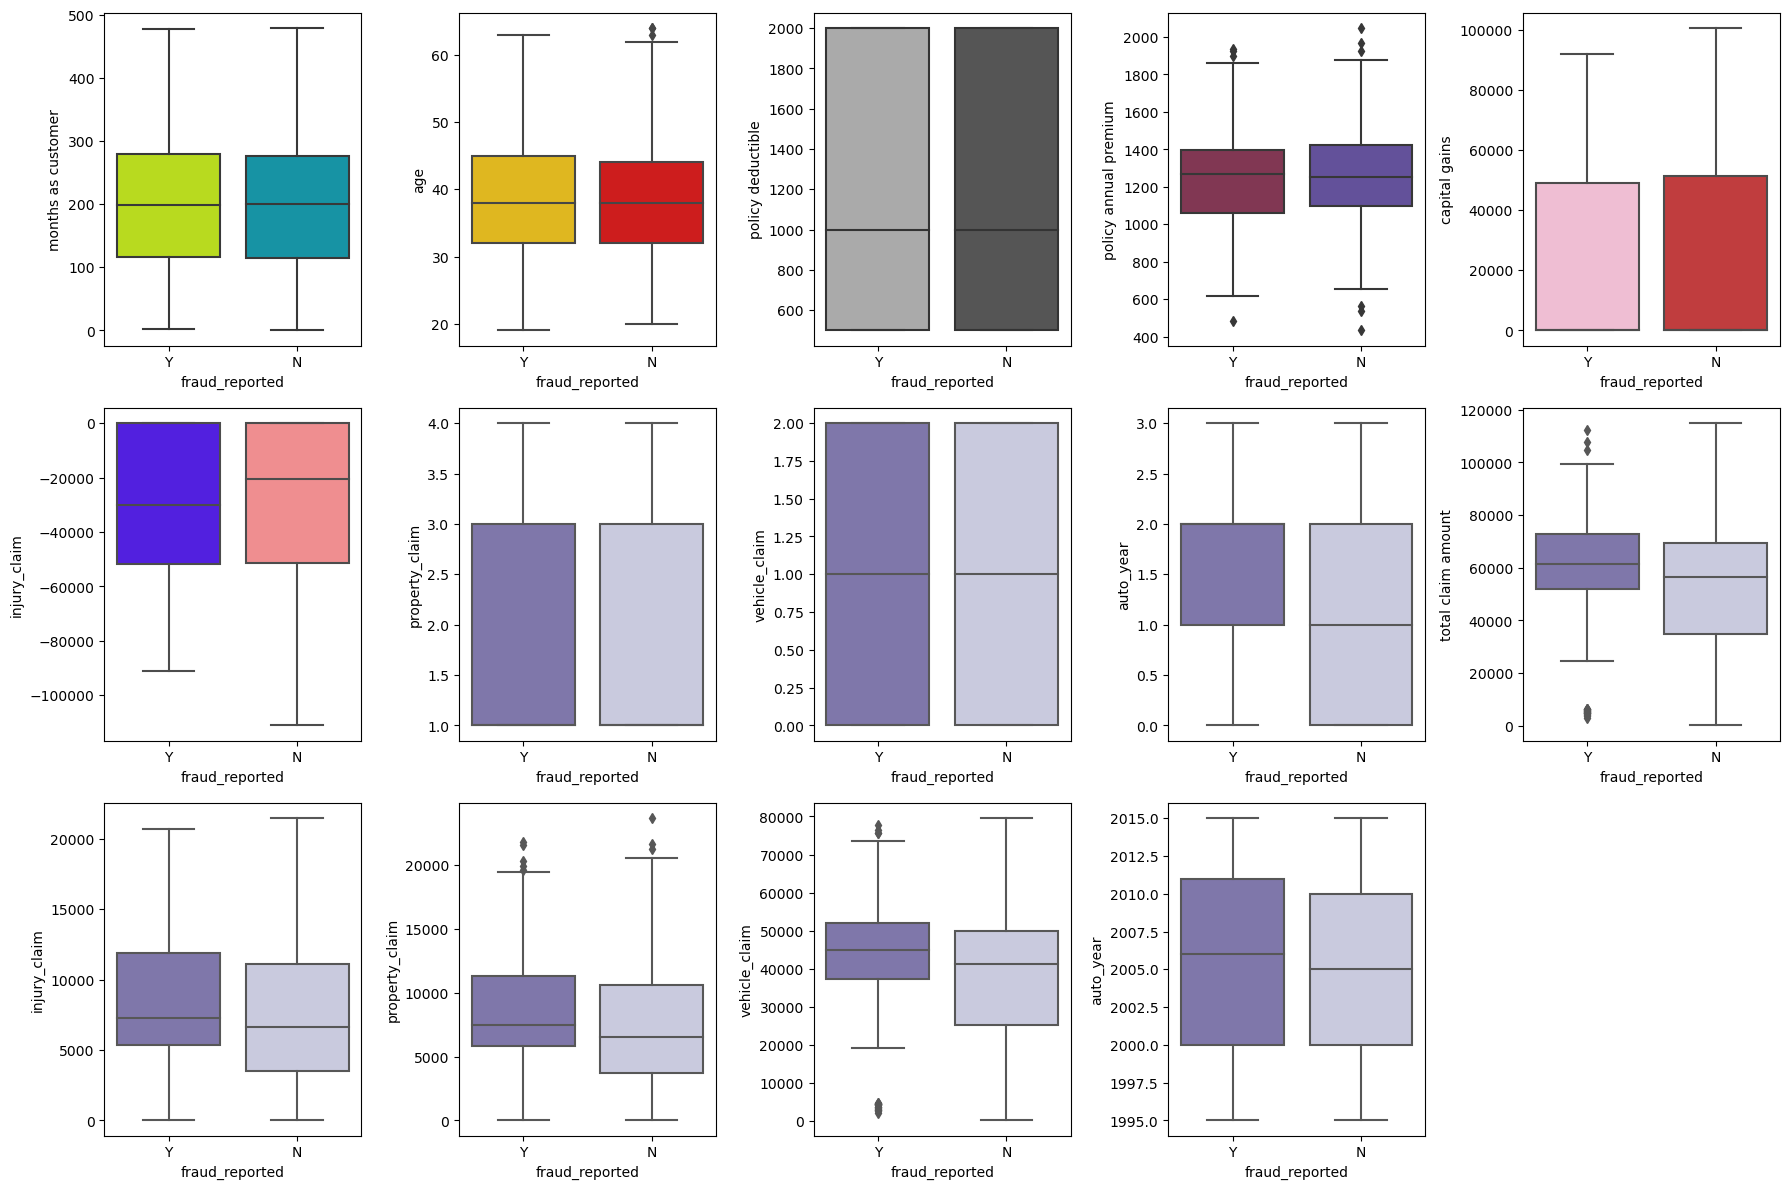

In [65]:
# visualizing Numerical features to find outliers
fig, axss = plt.subplots(3, 5, figsize=[18, 12])  # 3x5 grid to accommodate all 14 plots
sns.boxplot(x='fraud_reported', y='months_as_customer', data=df_fraudclaim, ax=axss[0][0], palette="nipy_spectral_r")
sns.boxplot(x='fraud_reported', y='age', data=df_fraudclaim, ax=axss[0][1], palette="hot_r")
sns.boxplot(x='fraud_reported', y='policy_deductable', data=df_fraudclaim, ax=axss[0][2], palette="gist_gray_r")
sns.boxplot(x='fraud_reported', y='policy_annual_premium', data=df_fraudclaim, ax=axss[0][3], palette="twilight_r")
sns.boxplot(x='fraud_reported', y='capital-gains', data=df_fraudclaim, ax=axss[0][4], palette="tab20_r")
sns.boxplot(x='fraud_reported', y='capital-loss', data=df_fraudclaim, ax=axss[1][0], palette="gnuplot2")
sns.boxplot(x='fraud_reported', y='number_of_vehicles_involved', data=df_fraudclaim, ax=axss[1][1], palette="Purples_r")
sns.boxplot(x='fraud_reported', y='bodily_injuries', data=df_fraudclaim, ax=axss[1][2], palette="Purples_r")
sns.boxplot(x='fraud_reported', y='witnesses', data=df_fraudclaim, ax=axss[1][3], palette="Purples_r")
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df_fraudclaim, ax=axss[1][4], palette="Purples_r")
sns.boxplot(x='fraud_reported', y='injury_claim', data=df_fraudclaim, ax=axss[2][0], palette="Purples_r")
sns.boxplot(x='fraud_reported', y='property_claim', data=df_fraudclaim, ax=axss[2][1], palette="Purples_r")
sns.boxplot(x='fraud_reported', y='vehicle_claim', data=df_fraudclaim, ax=axss[2][2], palette="Purples_r")
sns.boxplot(x='fraud_reported', y='auto_year', data=df_fraudclaim, ax=axss[2][3], palette="Purples_r")

# We hide the remaining empty subplots
for i in range(3):
    for j in range(5):
        if (i == 2 and j > 3) or (i == 1 and j > 4):
            axss[i][j].axis('off')

# Adding labels to the plots
axss[0][0].set_ylabel('months as customer')
axss[0][1].set_ylabel('age')
axss[0][2].set_ylabel('policy deductible')
axss[0][3].set_ylabel('policy annual premium')
axss[0][4].set_ylabel('capital gains')
axss[1][0].set_ylabel('capital loss')
axss[1][1].set_ylabel('number of vehicles involved')
axss[1][2].set_ylabel('bodily injuries')
axss[1][3].set_ylabel('witnesses')
axss[1][4].set_ylabel('total claim amount')
axss[1][0].set_ylabel('injury_claim')
axss[1][1].set_ylabel('property_claim')
axss[1][2].set_ylabel('vehicle_claim')
axss[1][3].set_ylabel('auto_year')

plt.tight_layout()
plt.savefig('numerical_dist.png')
plt.show()

There are clear instances of outliers in age, annual policy premium, total claim amount, property claims, and vehicle claims.

**Checking zscore**

In [66]:
z=np.abs(zscore(df_fraudclaim[['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]))
print(np.where(z>4))

(array([], dtype=int64), array([], dtype=int64))


In [67]:
z = np.abs(zscore(df_fraudclaim[['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]))
threshold = 4
df1 = df_fraudclaim[(z<4).all(axis = 1)]

In [68]:
print ("Shape of the dataframe before removing outliers: ", df_fraudclaim.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_fraudclaim.shape[0]-df1.shape[0])/df_fraudclaim.shape[0]*100)

Shape of the dataframe before removing outliers:  (1000, 39)
Shape of the dataframe after removing outliers:  (1000, 39)
Percentage of data loss post outlier removal:  0.0


In [69]:
df_fraudclaim.shape

(1000, 39)

**Checking for Skewness**

In [70]:
df_fraudclaim.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

Some of the columns exhibit a degree of skewness in the data. We will employ the cube root method to address this skewness.

**Removing Skewness**

In [71]:
# Removing skewness using cuberoot method
df_fraudclaim['months_as_customer'] = np .cbrt(df_fraudclaim['months_as_customer'])
df_fraudclaim['age'] = np .cbrt(df_fraudclaim['age'])
df_fraudclaim['policy_number'] = np .cbrt(df_fraudclaim['policy_number'])
df_fraudclaim['policy_deductable'] = np .cbrt(df_fraudclaim['policy_deductable'])
df_fraudclaim['policy_annual_premium'] = np .cbrt(df_fraudclaim['policy_annual_premium'])
df_fraudclaim['umbrella_limit'] = np .cbrt(df_fraudclaim['umbrella_limit'])
df_fraudclaim['insured_zip'] = np .cbrt(df_fraudclaim['insured_zip'])
df_fraudclaim['capital-gains'] = np .cbrt(df_fraudclaim['capital-gains'])
df_fraudclaim['capital-loss'] = np .cbrt(df_fraudclaim['capital-loss'])
df_fraudclaim['incident_hour_of_the_day'] = np .cbrt(df_fraudclaim['incident_hour_of_the_day'])
df_fraudclaim['number_of_vehicles_involved'] = np .cbrt(df_fraudclaim['number_of_vehicles_involved'])
df_fraudclaim['bodily_injuries'] = np .cbrt(df_fraudclaim['bodily_injuries'])
df_fraudclaim['witnesses'] = np .cbrt(df_fraudclaim['witnesses'])
df_fraudclaim['total_claim_amount'] = np .cbrt(df_fraudclaim['total_claim_amount'])
df_fraudclaim['injury_claim'] = np .cbrt(df_fraudclaim['injury_claim'])
df_fraudclaim['property_claim'] = np .cbrt(df_fraudclaim['property_claim'])
df_fraudclaim['vehicle_claim'] = np .cbrt(df_fraudclaim['vehicle_claim'])
df_fraudclaim['auto_year'] = np .cbrt(df_fraudclaim['auto_year'])

We have now removed skewness using the **cube root** method

In [72]:
# Let's Check the skewness again
df_fraudclaim.skew()

months_as_customer            -0.848648
age                            0.133494
policy_number                 -0.481667
policy_deductable              0.213909
policy_annual_premium         -0.451151
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.101965
capital-loss                   0.021896
incident_hour_of_the_day      -1.477252
number_of_vehicles_involved    0.422815
bodily_injuries               -0.559926
witnesses                     -0.895491
total_claim_amount            -1.290274
injury_claim                  -1.027894
property_claim                -0.996047
vehicle_claim                 -1.302471
auto_year                     -0.050769
dtype: float64

As we can observe, the skewness has been reduced.

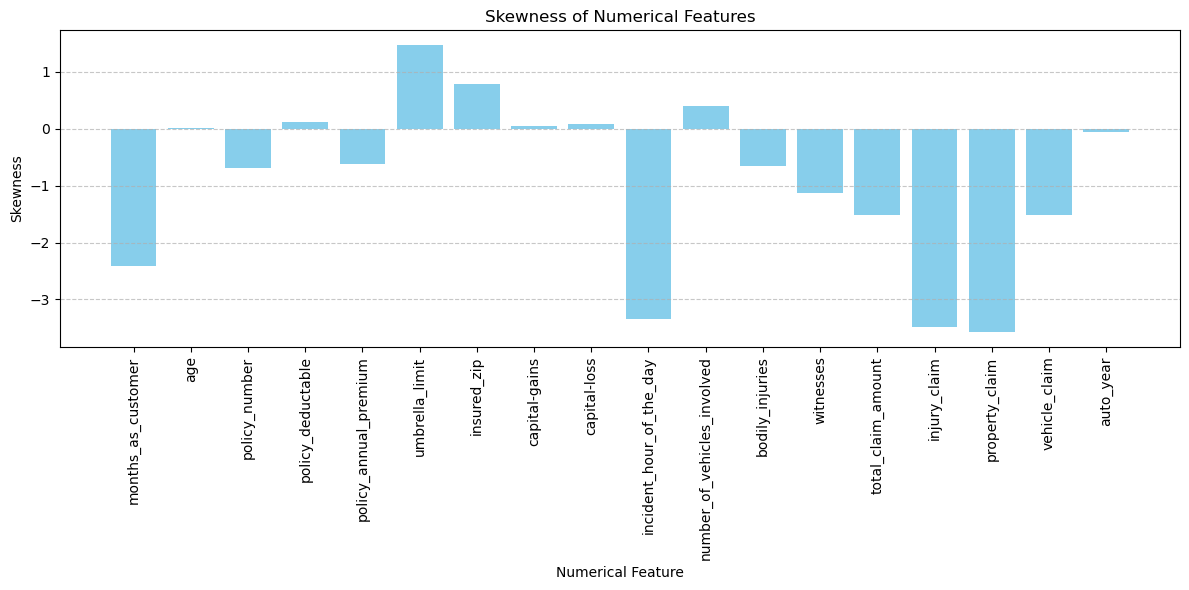

In [73]:
# Create a bar plot
# Skewness values
skewness_values = {
    'months_as_customer': -2.413353,
    'age': 0.016131,
    'policy_number': -0.683925,
    'policy_deductable': 0.114026,
    'policy_annual_premium': -0.625501,
    'umbrella_limit': 1.474321,
    'insured_zip': 0.786558,
    'capital-gains': 0.041669,
    'capital-loss': 0.089952,
    'incident_hour_of_the_day': -3.345048,
    'number_of_vehicles_involved': 0.405189,
    'bodily_injuries': -0.662814,
    'witnesses': -1.128268,
    'total_claim_amount': -1.511108,
    'injury_claim': -3.482788,
    'property_claim': -3.577560,
    'vehicle_claim': -1.521099,
    'auto_year': -0.051595
}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(skewness_values.keys(), skewness_values.values(), color='skyblue')
plt.title('Skewness of Numerical Features')
plt.xlabel('Numerical Feature')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Encoding Categorical Columns**

In [74]:
# Encoding Categorical Columns using OrdinalEncoder
OE = OrdinalEncoder()
for i in df_fraudclaim.columns:
    if df_fraudclaim[i].dtypes == 'object':
        df_fraudclaim[i] = OE.fit_transform(df_fraudclaim[i].values.reshape(-1,1))
df_fraudclaim

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,6.896434,3.634241,80.496136,532.0,2.0,1.0,10.000000,11.205264,0.000000,77.535925,...,1.259921,1.0,41.526426,18.672121,23.525399,37.344243,10.0,1.0,12.607604,1.0
1,6.109115,3.476027,69.991019,821.0,1.0,1.0,12.599210,10.618373,170.997595,77.649092,...,0.000000,0.0,17.179189,9.205164,9.205164,15.197391,8.0,12.0,12.613892,1.0
2,5.117230,3.072317,88.267180,186.0,2.0,0.0,12.599210,11.221779,170.997595,75.515384,...,1.442250,0.0,32.601262,19.746808,15.673052,28.479826,4.0,30.0,12.613892,0.0
3,6.349604,3.448217,61.074262,766.0,0.0,1.0,12.599210,11.228657,181.712059,84.721905,...,1.259921,0.0,39.874607,18.508153,18.508153,37.016306,3.0,34.0,12.628540,1.0
4,6.109115,3.530348,71.625564,181.0,0.0,2.0,10.000000,11.656733,181.712059,84.841967,...,1.000000,0.0,18.662556,10.913929,8.662391,16.570558,0.0,31.0,12.618081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.442250,3.361975,98.022867,487.0,2.0,2.0,10.000000,10.944069,0.000000,75.553768,...,1.000000,0.0,44.344405,25.932765,20.582849,39.373574,6.0,6.0,12.611797,0.0
996,6.580844,3.448217,57.178062,129.0,0.0,0.0,10.000000,11.284035,0.000000,84.724692,...,1.442250,0.0,47.692478,26.246182,26.246182,41.663217,13.0,28.0,12.630630,0.0
997,5.065797,3.239612,97.206560,509.0,2.0,1.0,7.937005,11.142740,144.224957,76.219873,...,1.442250,1.0,40.716264,19.574338,19.574338,37.444362,11.0,19.0,12.590805,0.0
998,7.708239,3.957892,81.126764,573.0,0.0,2.0,12.599210,11.070946,170.997595,76.157683,...,1.000000,1.0,36.083141,17.346965,17.346965,33.183550,1.0,5.0,12.595009,0.0


In [75]:
df_fraudclaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   float64
 1   age                          1000 non-null   float64
 2   policy_number                1000 non-null   float64
 3   policy_bind_date             1000 non-null   float64
 4   policy_state                 1000 non-null   float64
 5   policy_csl                   1000 non-null   float64
 6   policy_deductable            1000 non-null   float64
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   float64
 9   insured_zip                  1000 non-null   float64
 10  insured_sex                  1000 non-null   float64
 11  insured_education_level      1000 non-null   float64
 12  insured_occupation           1000 non-null   float64
 13  insured_hobbies    

We have applied the Ordinal Encoding (OE) method to transform the categorical columns into numerical columns.

In [76]:
# The Statistical Summary of numerical
df_fraudclaim.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.606325,3.369228,79.322392,474.332000,1.01400,0.951000,10.092413,10.743125,35.041446,79.263315,...,0.923447,0.314000,35.549072,17.937456,17.997289,31.852513,6.546000,19.318000,12.609904,0.247000
std,1.330286,0.263127,14.289213,275.402851,0.83096,0.804516,1.877386,0.719300,70.601464,3.664509,...,0.554855,0.464349,9.090148,5.902164,5.703225,8.130009,4.034869,11.136107,0.012612,0.431483
min,0.000000,2.668402,46.539951,0.000000,0.00000,0.000000,7.937005,7.567276,-100.000000,75.484508,...,0.000000,0.000000,4.641589,0.000000,0.000000,4.121285,0.000000,0.000000,12.588702,0.000000
25%,4.873485,3.174802,69.519170,233.750000,0.00000,0.000000,7.937005,10.290189,0.000000,76.540269,...,1.000000,0.000000,34.708453,16.255021,16.442092,31.172980,3.000000,10.000000,12.599210,0.000000
50%,5.843154,3.361975,81.085952,472.500000,1.00000,1.000000,10.000000,10.792816,0.000000,77.553303,...,1.000000,0.000000,38.720989,18.922118,18.898816,34.787831,7.000000,20.000000,12.609701,0.000000
75%,6.512794,3.530348,91.221999,713.250000,2.00000,2.000000,12.599210,11.228539,0.000000,84.495326,...,1.259921,1.000000,41.328806,22.443478,22.162025,37.041223,10.000000,29.000000,12.620174,0.000000
max,7.824294,4.000000,99.981163,950.000000,2.00000,2.000000,12.599210,12.698361,215.443469,85.314269,...,1.442250,1.000000,48.618162,27.784917,28.712175,43.009553,13.000000,38.000000,12.630630,1.000000


After encoding the categorical columns, we gain access to a detailed summary of all column information. Consistent counts across all columns signify that the dataset contains non missing values. By utilizing the describe method, we obtain statistical insights such as **count, mean, standard deviation, minimum, interquartile range (IQR), and maximum values** for each column, providing a comprehensive overview of the dataset's characteristics.

**Correlation between Target variable and Independent Variables.**

In [77]:
# Checking the correlation between features and the target.
cor = df_fraudclaim.corr()
cor

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.826109,0.052692,0.040818,0.004074,-0.029691,0.015272,0.018832,-0.000440,0.009110,...,0.043213,-0.007311,0.045286,0.043100,0.018144,0.046542,0.049243,0.011092,-0.002658,0.011004
age,0.826109,1.000000,0.060366,0.054353,-0.017039,-0.015625,0.023869,0.024680,0.003489,0.025825,...,0.049331,-0.018061,0.058731,0.059818,0.054575,0.053973,0.027693,0.016118,0.002327,0.007775
policy_number,0.052692,0.060366,1.000000,0.050241,0.068360,0.037738,-0.016306,0.015845,0.011924,0.011946,...,-0.002422,0.024365,-0.008412,0.006253,0.003794,-0.009577,0.016166,0.063033,-0.001528,-0.025977
policy_bind_date,0.040818,0.054353,0.050241,1.000000,0.015289,0.008486,-0.011672,-0.037351,-0.022765,-0.043065,...,-0.004918,-0.011563,0.014842,0.022162,0.024132,0.013585,-0.025955,0.000306,0.035107,0.060642
policy_state,0.004074,-0.017039,0.068360,0.015289,1.000000,0.001027,0.008885,0.011597,-0.023417,0.009257,...,0.030904,0.069017,-0.003205,-0.044651,0.009481,0.001244,0.017124,-0.025253,0.002112,0.029432
policy_csl,-0.029691,-0.015625,0.037738,0.008486,0.001027,1.000000,0.002483,0.024059,0.018837,0.006812,...,0.064436,-0.001645,-0.062731,-0.046105,-0.052899,-0.057867,-0.004701,0.047885,-0.033061,-0.037190
policy_deductable,0.015272,0.023869,-0.016306,-0.011672,0.008885,0.002483,1.000000,0.003417,0.001979,0.000230,...,0.056004,0.039574,0.012763,0.054885,0.045626,0.003265,-0.032519,-0.003691,0.025449,0.010169
policy_annual_premium,0.018832,0.024680,0.015845,-0.037351,0.011597,0.024059,0.003417,1.000000,0.001115,0.034501,...,0.018242,0.023015,0.011877,0.007315,0.013275,0.017513,0.001882,-0.027509,-0.052409,-0.017241
umbrella_limit,-0.000440,0.003489,0.011924,-0.022765,-0.023417,0.018837,0.001979,0.001115,1.000000,0.012090,...,-0.010359,-0.050633,-0.036400,-0.024258,-0.028014,-0.035866,0.005630,0.031389,0.010374,0.060104
insured_zip,0.009110,0.025825,0.011946,-0.043065,0.009257,0.006812,0.000230,0.034501,0.012090,1.000000,...,0.029672,0.009219,-0.039557,-0.037229,-0.021430,-0.042677,-0.021277,0.023561,-0.032849,0.021124


This reveals the correlation between the dependent and independent variables. We shall illustrate this relationship by generating a heatmap plot.

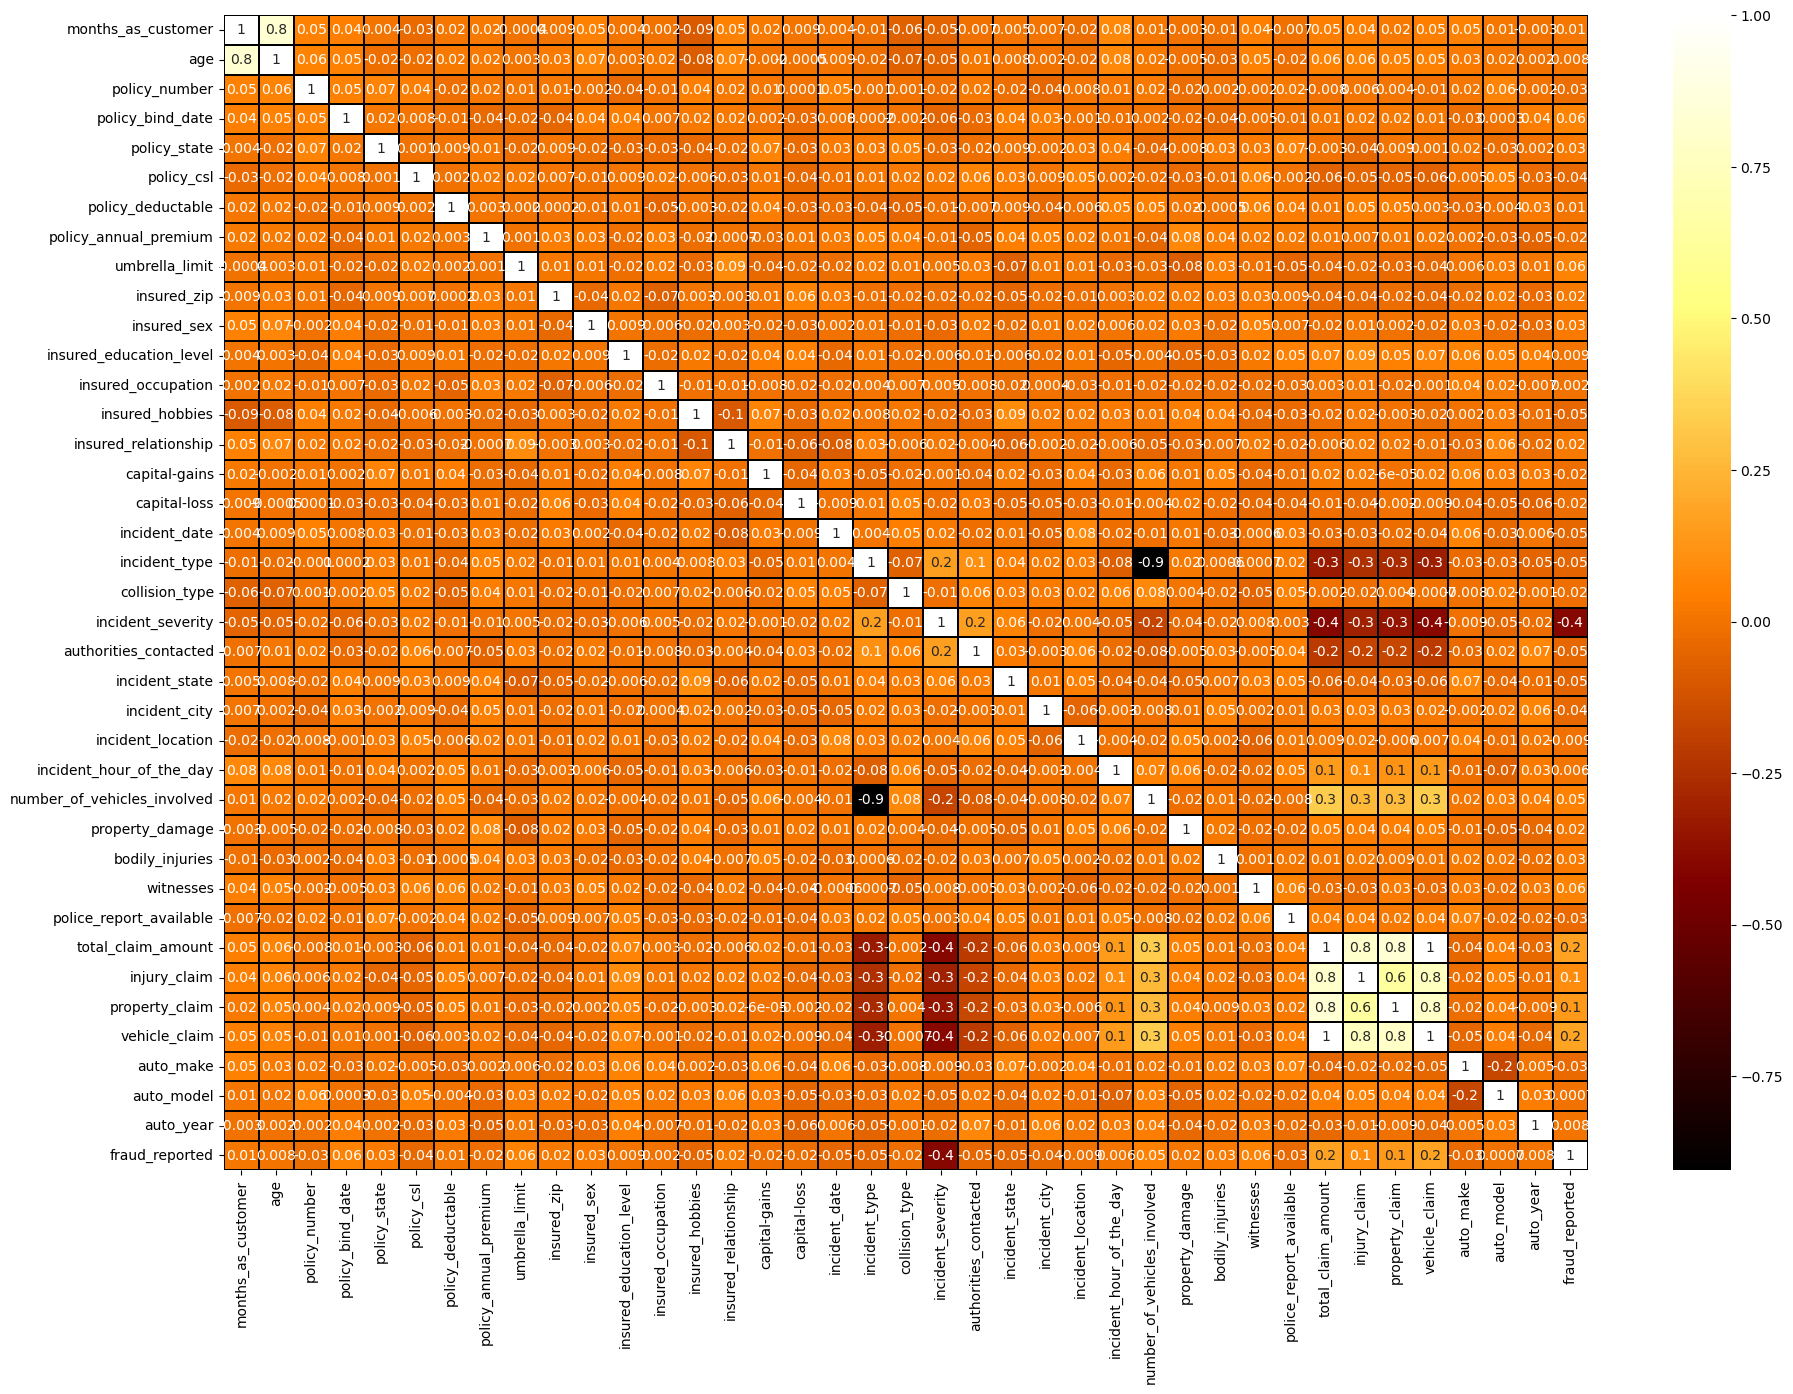

In [78]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (22, 15))
sns.heatmap(df_fraudclaim.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "afmhot")
plt.yticks(rotation = 0);
plt.show()

In [79]:
# 0- no relation, -0.3 to +0.3- less correlation, greater than -0.5 or greater than +0.5- moderate correlation, greater than -0.7

In [80]:
cor['fraud_reported'].sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.177350
total_claim_amount             0.173705
property_claim                 0.140313
injury_claim                   0.096108
witnesses                      0.061369
policy_bind_date               0.060642
umbrella_limit                 0.060104
number_of_vehicles_involved    0.050843
insured_sex                    0.030873
policy_state                   0.029432
bodily_injuries                0.025731
insured_zip                    0.021124
insured_relationship           0.021043
property_damage                0.017202
months_as_customer             0.011004
policy_deductable              0.010169
insured_education_level        0.008808
auto_year                      0.007919
age                            0.007775
incident_hour_of_the_day       0.005969
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.017241


Above is the +ve and -ve correlated features with the target.

**Visualizing the correlation between label and features using bar plot**

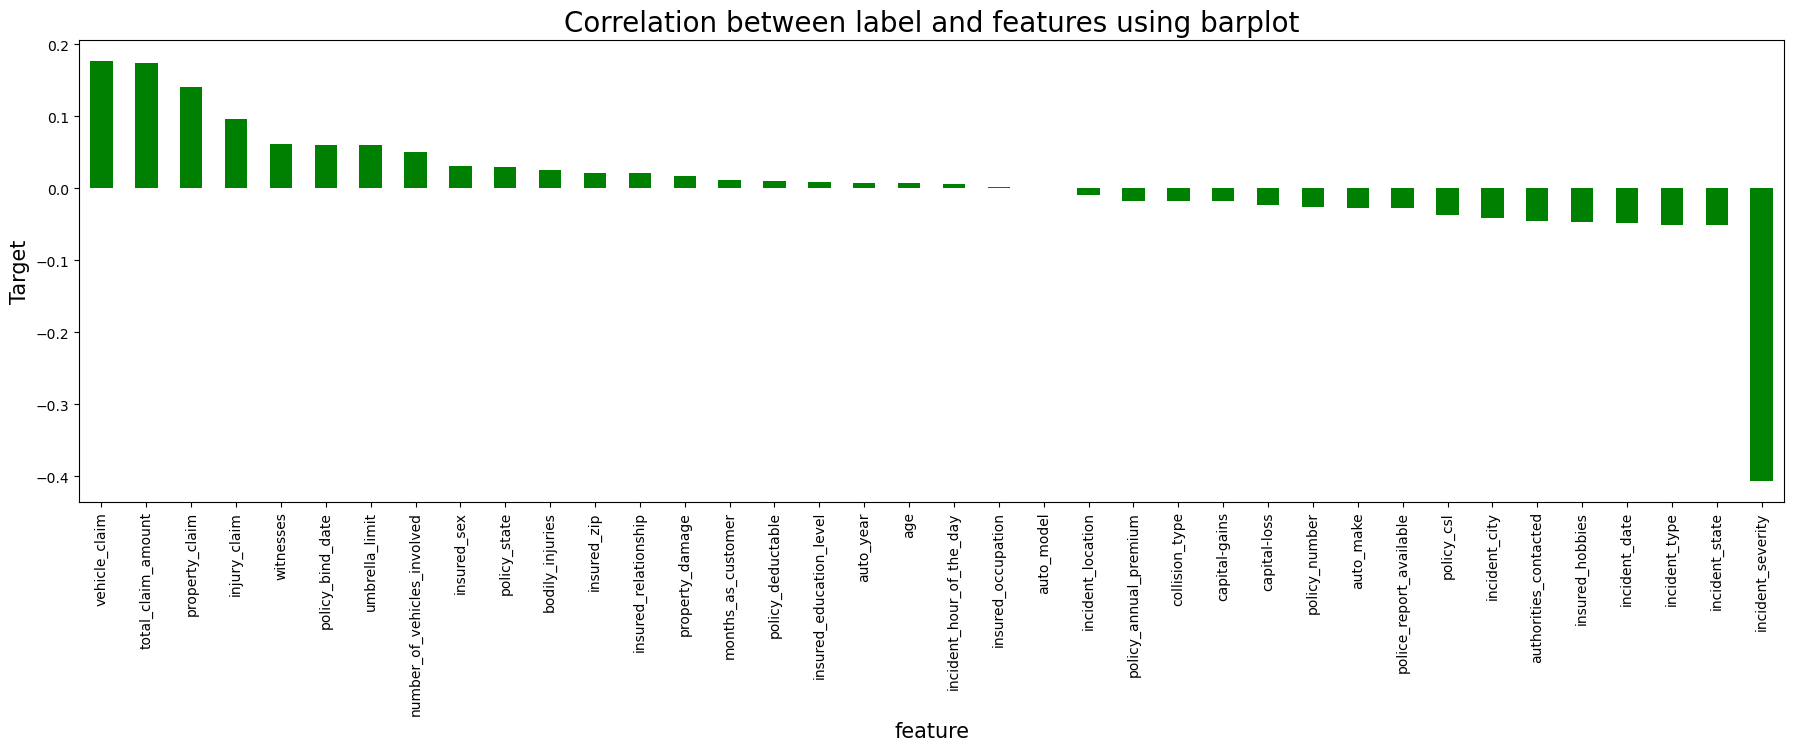

In [81]:
plt.figure(figsize = (22, 6))
df_fraudclaim.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color="g")
plt.xlabel('feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize=20)
plt.show()

The bar plot above displays positive and negative correlations between the features and the target variable. It is evident that the features insured_occupation, incident_hour_of_the_day, age, auto_year, insured_education_level, and policy_deductable exhibit very low correlation with the target column.

**Separating Features and label**

In [82]:
x = df_fraudclaim.drop("fraud_reported", axis =1)
y = df_fraudclaim["fraud_reported"]

**Feature Scaling using standard scalarization**

In [83]:
Scaler = StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x), columns = x.columns)
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,0.970284,1.007672,0.082183,0.209500,1.187173,0.060937,-0.049249,0.642806,-0.496576,-0.471620,...,0.464705,0.606721,1.478078,0.657893,0.124536,0.969780,0.675827,0.856466,-1.645743,-0.182465
1,0.378145,0.406085,-0.653363,1.259397,-0.016856,0.060937,1.335927,-0.173522,1.926648,-0.440722,...,-1.366961,-1.665135,-0.676554,-2.021867,-1.480247,-1.542377,-2.049623,0.360539,-0.657470,0.316375
2,-0.367846,-1.128960,0.626295,-1.047470,1.187173,-1.182668,1.335927,0.665778,1.926648,-1.023277,...,0.940793,0.935491,-0.676554,-0.324449,0.306711,-0.407734,-0.415052,-0.631315,0.959702,0.316375
3,0.559016,0.300344,-1.277695,1.059589,-1.220886,0.060937,1.335927,0.675345,2.078484,1.490328,...,0.464705,0.606721,-0.676554,0.476087,0.096741,0.089619,0.635470,-0.879279,1.319074,1.478404
4,0.378145,0.612635,-0.538916,-1.065634,-1.220886,1.304542,-0.049249,1.270770,2.078484,1.523108,...,-1.366961,0.138039,-0.676554,-1.858602,-1.190587,-1.637594,-1.880638,-1.623169,1.049545,0.648658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.131778,-0.027577,1.309368,0.046021,1.187173,1.304542,-0.049249,0.279500,-0.496576,-1.012797,...,-1.366961,0.138039,-0.676554,0.968052,1.355318,0.453577,0.925562,-0.135388,-1.196528,0.150150
996,0.732930,0.300344,-1.550499,-1.254543,-1.220886,-1.182668,-0.049249,0.752372,-0.496576,1.491089,...,0.940793,0.935491,-0.676554,1.336555,1.408447,1.447080,1.207331,1.600357,0.780016,1.644188
997,-0.406528,-0.492846,1.252211,0.125944,1.187173,0.060937,-1.148665,0.555839,1.547250,-0.830934,...,0.940793,0.935491,1.478078,0.568723,0.277475,0.276657,0.688148,1.104430,-0.028570,-1.515143
998,1.580837,2.238303,0.126338,0.358447,-1.220886,1.304542,1.335927,0.455979,1.926648,-0.847913,...,-1.366961,0.138039,1.478078,0.058782,-0.100097,-0.114084,0.163801,-1.375206,-1.286371,-1.181640


We applied the Standard Scalarization method to the data in order to mitigate potential biases and ensure data integrity.

**Checking Variance Inflation Factor(VIF)**

In [84]:
# Finding variance inflation factor in each scaled column i.e.x.shape[1] (1/(1-R2))
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,3.214714,months_as_customer
1,3.241679,age
2,1.034020,policy_number
3,1.028193,policy_bind_date
4,1.039665,policy_state
5,1.035382,policy_csl
6,1.037208,policy_deductable
7,1.044358,policy_annual_premium
8,1.033244,umbrella_limit
9,1.032633,insured_zip


Evaluating the **Variance Inflation Factor** (VIF) is crucial for detecting variables that contribute to multicollinearity. Our analysis reveals that the "total_claim_amount" and "vehicle_claim" variables exhibit a VIF exceeding 10.00, indicating substantial correlation with other variables. Consequently, we opt to remove these variables due to their notably high VIF values.

In [85]:
# Dropping total claim amount and vehicle claim column
x.drop("total_claim_amount", axis = 1, inplace = True)
x.drop("vehicle_claim", axis = 1, inplace = True)

In [86]:
# Lets again check the VIF value to confirm the existence of multicollinearity
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.201450,months_as_customer
1,3.226871,age
2,1.032157,policy_number
3,1.026325,policy_bind_date
4,1.039074,policy_state
5,1.027053,policy_csl
6,1.026074,policy_deductable
7,1.033895,policy_annual_premium
8,1.032664,umbrella_limit
9,1.028016,insured_zip


Now that we've solved the multicollinearity problem, we can proceed with to building our ML models.

### Balancing the Dataset

In [87]:
y.value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

Our analysis reveals an imbalance in the dataset. Given that the task involves classification, we will address this imbalance by implementing the **synthetic minority oversampling technique** (SMOTE) to achieve a balanced dataset.

**Oversampling**

In [88]:
# Oversampling the data 
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [89]:
# checking the value count of target column
y.value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

In [90]:
y1.value_counts()

1.0    753
0.0    753
Name: fraud_reported, dtype: int64

Now that the dataset is balanced, we're ready to build our machine learning classification models.

## Machine Learning Models

**Finding the best random state**

In [91]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.911504424778761 at random_state 8


**SPLIT INTO TRAIN AND TEST (70:30 rule)**

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRs)

**Logistic Regression**

In [93]:
# Checking accuracy for the LR Model
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7278761061946902
[[170  79]
 [ 44 159]]
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       249
         1.0       0.67      0.78      0.72       203

    accuracy                           0.73       452
   macro avg       0.73      0.73      0.73       452
weighted avg       0.74      0.73      0.73       452



The accuracy score using Logistic Regression is 73%

**RandomForestClassifier**

In [94]:
# Checking accuracy for RF-Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9092920353982301
[[227  22]
 [ 19 184]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       249
         1.0       0.89      0.91      0.90       203

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452



The accuracy score using RandomForestClassifier is 91%

**Decision Tree Classifier**

In [95]:
# Checking accuracy for DT-Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.834070796460177
[[205  44]
 [ 31 172]]
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       249
         1.0       0.80      0.85      0.82       203

    accuracy                           0.83       452
   macro avg       0.83      0.84      0.83       452
weighted avg       0.84      0.83      0.83       452



The accuracy score using DecisionTreeClassifier is 83%

**K-Nearest Neighbors(KNN) Classifier**

In [96]:
# Checking accuracy for the KNN Model
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
predKNN = KNN.predict(x_test)
print(accuracy_score(y_test, predKNN))
print(confusion_matrix(y_test, predKNN))
print(classification_report(y_test, predKNN))

0.5752212389380531
[[ 62 187]
 [  5 198]]
              precision    recall  f1-score   support

         0.0       0.93      0.25      0.39       249
         1.0       0.51      0.98      0.67       203

    accuracy                           0.58       452
   macro avg       0.72      0.61      0.53       452
weighted avg       0.74      0.58      0.52       452



The accuracy score using KNeighborsClassifier is 58%

**AdaBoostClassifier Model**

In [97]:
# Checking accuracy for the AdaBoostClassifier  Model
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8938053097345132
[[226  23]
 [ 25 178]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       249
         1.0       0.89      0.88      0.88       203

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452



The accuracy score using the AdaBoostClassifier is 89%

**Gradient Boosting Classifier**

In [98]:
# Checking accuracy for the Gradient Boosting Classifier  Model
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test, predGBC))
print(confusion_matrix(y_test, predGBC))
print(classification_report(y_test, predGBC))

0.9048672566371682
[[223  26]
 [ 17 186]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       249
         1.0       0.88      0.92      0.90       203

    accuracy                           0.90       452
   macro avg       0.90      0.91      0.90       452
weighted avg       0.91      0.90      0.91       452



The accuracy score using the Gradient Boosting Classifier is 90%

**Support Vector Machine(SVC)Classifier**

In [99]:
# Checking the accuracy for support Vector Machine Classifier
SVC = SVC()
SVC.fit(x_train, y_train)
predSVC = SVC.predict(x_test)
print(accuracy_score(y_test, predSVC))
print(confusion_matrix(y_test, predSVC))
print(classification_report(y_test, predSVC))

0.8761061946902655
[[211  38]
 [ 18 185]]
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88       249
         1.0       0.83      0.91      0.87       203

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



The accuracy score using the SVC is 88%

**The ExtraTreesClassifier**

In [100]:
# Checking for accuracy for ExtraTree Classifier
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test, predETC))
print(confusion_matrix(y_test, predETC))
print(classification_report(y_test, predETC))

0.911504424778761
[[225  24]
 [ 16 187]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       249
         1.0       0.89      0.92      0.90       203

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452



The accuracy score using the Extra Trees Classifier is 91%

**Cross Validation Score**

In [101]:
# checking cv score for Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predLR)- score.mean())

[0.77  0.755 0.73  0.79  0.775]
0.764
Difference between Accuracy score and cross validation score is - -0.03612389380530978


In [102]:
# checking cv score for Random Forest classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predRFC)- score.mean())

[0.795 0.785 0.775 0.77  0.795]
0.784
Difference between Accuracy score and cross validation score is - 0.12529203539823008


In [103]:
# checking cv score for DecisionTree classifier
score = cross_val_score(DTC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predDTC)- score.mean())

[0.78  0.78  0.785 0.795 0.835]
0.795
Difference between Accuracy score and cross validation score is - 0.03907079646017697


In [104]:
# checking cv score for KNN classifier
score = cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predKNN)- score.mean())

[0.71  0.755 0.685 0.755 0.72 ]
0.725
Difference between Accuracy score and cross validation score is - -0.14977876106194687


In [105]:
# checking cv score for AdaBoosting Classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predABC)- score.mean())

[0.765 0.79  0.75  0.8   0.83 ]
0.7870000000000001
Difference between Accuracy score and cross validation score is - 0.10680530973451308


In [106]:
# checking cv score for Gradient Boosting Classifier
score = cross_val_score(GBC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predGBC)- score.mean())

[0.82  0.785 0.795 0.86  0.85 ]
0.8219999999999998
Difference between Accuracy score and cross validation score is - 0.08286725663716832


In [107]:
# checking cv score for SVM classifier
score = cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predSVC)- score.mean())

[0.75  0.735 0.74  0.76  0.755]
0.7479999999999999
Difference between Accuracy score and cross validation score is - 0.12810619469026563


In [108]:
# checking cv score for Extra Trees Clasifier
score = cross_val_score(ETC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predETC)- score.mean())

[0.765 0.765 0.74  0.745 0.77 ]
0.757
Difference between Accuracy score and cross validation score is - 0.15450442477876103


The **Logistic Regression** has the least absolute difference between the model's accuracy and cross-validation accuracy.and therefore selected as the final model.

The **Logistic Regression** is our best model

**Hyper Parameter Tunning**

In [109]:
# Defining the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']  # Solver for optimization
}

# Create a Logistic Regression model
LR = LogisticRegression()

# Create GridSearchCV instance
GCV = GridSearchCV(LR, param_grid, cv=5)

# Fit the GridSearchCV
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga']})

In [110]:
GCV.best_params_

{'C': 0.1, 'solver': 'lbfgs'}

In [111]:
# Create a Logistic Regression model with specified parameters
LR = LogisticRegression(C=1.0, solver='liblinear', random_state=100)

# Fit the model to the training data
LR.fit(x_train, y_train)

# Make predictions on the test data
pred = LR.predict(x_test)

# Calculate accuracy
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc * 100)

Accuracy: 72.78761061946902


**Plotting ROC and compare AUC for all the models used**

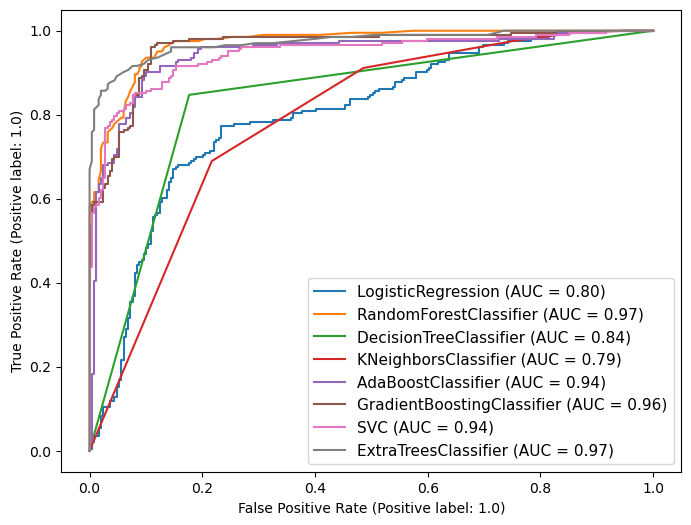

In [112]:
# Fit the Logistic Regression model
LR.fit(x_train, y_train)

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC curve for each model
plot_roc_curve(LR, x_test, y_test, ax=ax)
plot_roc_curve(RFC, x_test, y_test, ax=ax)
plot_roc_curve(DTC, x_test, y_test, ax=ax)
plot_roc_curve(KNN, x_test, y_test, ax=ax)
plot_roc_curve(ABC, x_test, y_test, ax=ax)
plot_roc_curve(GBC, x_test, y_test, ax=ax)
plot_roc_curve(SVC, x_test, y_test, ax=ax)
plot_roc_curve(ETC, x_test, y_test, ax=ax)

# Add legend
plt.legend(prop={'size': 11}, loc='lower right')

# Show plot
plt.show()

Here we can see the area under curve(AUC) for each models used.However, this method has since been DEPRECATED.

**Alternative method**

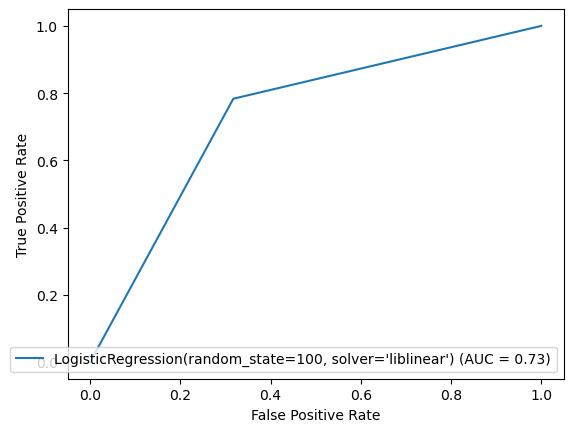

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=LR)
display.plot()

The ROC curve for the final model haven been plotted gave AUC value of 73% for the best model.

**Saving the Model**

In [114]:
# Saving the model using .pkl
import joblib
joblib.dump(LR, "Insurance claim fraud detection.pki")

['Insurance claim fraud detection.pki']

In [115]:
# Lets load the saved model and get the predictions
LR = joblib.load("Insurance claim fraud detection.pki")

# prediction
prediction = LR.predict(x_test)
prediction

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0.

These are the predicted Insurance claim Fraud.

In [116]:
a = np.array(y_test)
df_test = pd.DataFrame()
df_test["predicted"] = prediction
df_test["original"] = a
df_test

,predicted,original
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
447,1.0,0.0
448,0.0,0.0
449,1.0,1.0
450,1.0,0.0


In [117]:
modelname = LogisticRegression()

In [118]:
# Training the model on the training data
modelname.fit(x_train, y_train)

LogisticRegression()

**Prediction On The Test Data**

In [119]:
# Make predictions on the test data
predictions = modelname.predict(x_test)

In [120]:
conclusion = pd.DataFrame({'Predicted': predictions, 'Original': y_test})

In [121]:
# Creating a dictionary with your data
data = {
    'Predicted': modelname.predict(x_test),
    'Original': y_test
}

In [122]:
# Creating a DataFrame from the data dictionary
conclusion = pd.DataFrame(data)

In [123]:
# Create a DataFrame with 'Predicted' and 'Original' columns
conclusion = pd.DataFrame({'Predicted': modelname.predict(x_test), 'Original': y_test})

In [124]:
print(conclusion)

      Predicted  Original
1475        0.0       1.0
640         0.0       0.0
621         0.0       0.0
1496        0.0       1.0
1190        0.0       1.0
...         ...       ...
540         1.0       0.0
225         0.0       0.0
1330        1.0       1.0
345         1.0       0.0
1091        1.0       1.0

[452 rows x 2 columns]


**Evaluating the Predicted values in relation to the actual data**

**Predicted**: This column displays the predicted values for the determination of the fraudulent nature of the insurance claim. A value of 1.0 generally signifies a prediction of "Yes," indicating fraud, while a value of 0.0 typically signifies a prediction of "No," indicating no fraud.

**Original**: This column represents the actual status of the insurance claim, whether it was fraudulent ("Yes") or not ("No").

Now, let's break down the analysis:

**True Positives (TP)**: The model accurately predicts cases of fraud by aligning with the original data. There are instances where both the predicted and original values are 1.0, which means that fraud has been accurately identified.

**False Positives (FP)**: These instances involve situations in which the model made a prediction of fraud ("Yes"), but the claim was found not to be fraudulent ("No" in the original dataset). We can see examples where the predicted value is 1.0 while the original value is 0.0. 

**True Negatives (TN)**: These instances involve situations in which the model made a prediction of no fraud ("No") and the actual claim was also not fraudulent ("No" in the original dataset).An occurrence was observed where both the predicted and original values were 0.0, signifying an accurate prediction of no fraud.

**False Negatives (FN)**:These instances involve situations in which the model did not detect any fraudulent activity ("No"), yet the actual claim was indeed fraudulent ("Yes" according to the original data). There is an observation of one instance where the predicted value is 0.0, while the original value is 1.0.

### Summary and Conclusion

**Summary**

The objective of this project was to create a predictive algorithm for identifying fraudulent auto insurance claims through the application of machine learning methods. Several models were trained and assessed based on their performance measures such as precision, recall, F1-score, ROC-AUC, and accuracy. The models examined comprised **Logistic Regression, Random Forest Classifier, Decision Tree Classifier, KNN Classifier, ADABoost Classifier, Gradient Boosting Classifier, SVM Classifier, and ExtraTrees Classifier**. Among these models, Logistic Regression exhibited the least absolute variance between accuracy and cross-validation accuracy (i.e., -0.036), leading to its selection as the final model.

**Conclusion**

The project illustrated the effectiveness of machine learning models in the **detection of fraudulent auto insurance claims**. Although various models performed well, **Logistic Regression**, with a ROC-AUC of 73%, was selected for its balanced accuracy and cross-validation accuracy. Nevertheless, additional refinement and evaluation may be required to enhance the model's predictive capacity and overcome potential constraints. Consequently, the project represents a promising strategy for combating insurance fraud in the **auto insurance sector of the financial services industry** through the application of machine learning methods.

### The End